# MUTIPLE LINEAR REGRESSION - TO PREDICT ELECTRICAL ENERGY OUTPUT

dataset link - https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T),
Ambient Pressure (AP), 
Relative Humidity (RH) and
Exhaust Vacuum (V)
to predict the net hourly electrical energy output (EP)  of the plant.




# import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix

# GET THE DATA

In [2]:
df = pd.read_excel('Folds5x2_pp.xlsx')

In [3]:
df.shape

(9568, 5)

In [4]:
df.isnull().values.any()

False

In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# DATA ANALYSIS

In [6]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


Features consist of hourly average ambient variables

Temperature (T) in the range 1.81°C and 37.11°C,
Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
Relative Humidity (RH) in the range 25.56% to 100.16%
Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
Net hourly electrical energy output (EP) 420.26-495.76 MW


D:\anaconda_installation\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda_installation\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
D:\anaconda_installation\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
D:\anaconda_installation\lib\site-packages\pandas\plotting\_matpl

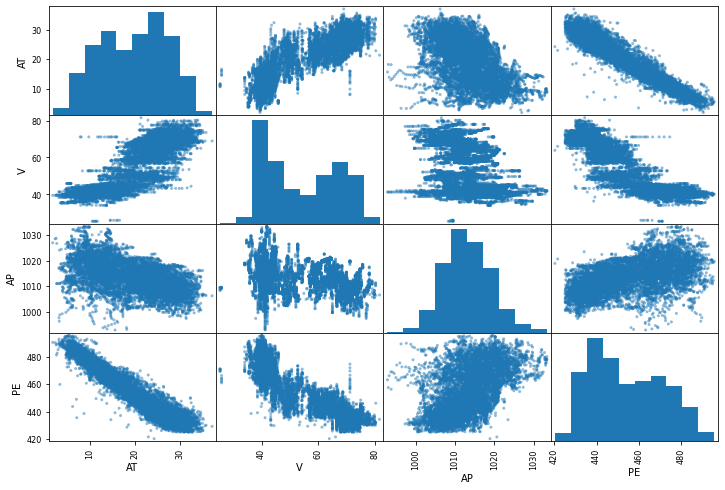

In [7]:
attributes = ['AT', 'V', 'AP', 'PE']
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()


#  training and testing

In [8]:
x = df.iloc[:,0:4].values
y = df.iloc[:,-1].values.reshape(-1,1)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

# training the model

In [10]:
m_lr = LinearRegression()

In [11]:
m_lr.fit(x_train, y_train)

LinearRegression()

# tesing the model

In [12]:
y_pred = m_lr.predict(x_test)

In [13]:
x_train.shape

(7654, 4)

In [14]:
y_train.shape

(7654, 1)

# evaluating the model

In [15]:
from sklearn import metrics
mae=(metrics.mean_absolute_error(y_test,y_pred))
print(mae)
mse=(metrics.mean_squared_error(y_test,y_pred))
print(mse)
rmse=(np.sqrt(mse))
print(rmse)

3.5959131782734097
20.273705999687447
4.5026332295321865
